<a href="https://colab.research.google.com/github/CorkCork/PREPPERs/blob/main/PREPPERs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
import pandas
import os
os.environ["GCLOUD_PROJECT"] = "projectx-272822"
from google.cloud import bigquery

%load_ext google.colab.data_table

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Histogram of Shipping Time

In [ ]:
%%bigquery shipping_time

SELECT  
`projectx-272822.preppers.shooters`.ShippingTimeDays AS Shipping_Time
FROM `projectx-272822.preppers.orders` 
JOIN
`projectx-272822.preppers.shooters` ON `projectx-272822.preppers.orders`.ID = `projectx-272822.preppers.shooters`.ID

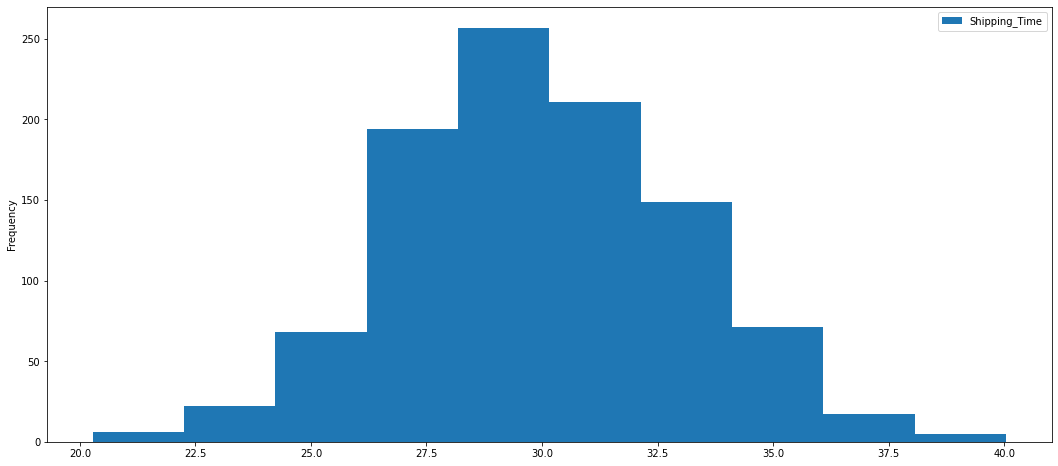

In [ ]:
shipping_time.plot(kind='hist', figsize=(18, 8));

Distributions of Shipping costs by Shipper

In [ ]:
%%bigquery shipping_cost

SELECT ROUND(AVG(`projectx-272822.preppers.shooters`.ShipCost),1) AS Cost,
`projectx-272822.preppers.shooters`.Shipper
FROM `projectx-272822.preppers.shooters` 
GROUP BY Shipper

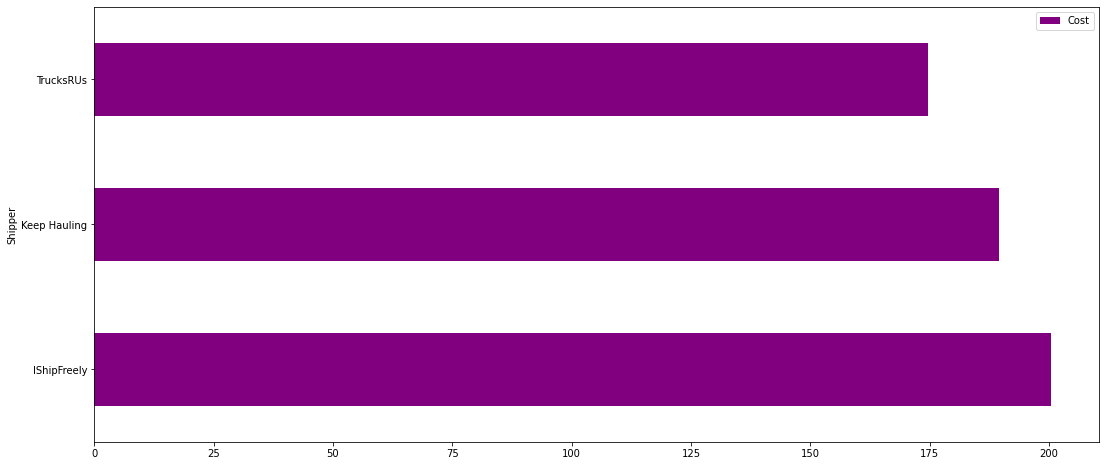

In [ ]:
shipping_cost.plot(kind='barh', x='Shipper', y='Cost', figsize=(18, 8), color=['purple']);

Let's check the shipping times for shippers as well.

In [ ]:
%%bigquery shipping_time

SELECT ROUND(AVG(`projectx-272822.preppers.shooters`.ShippingTimeDays),1) AS Days,
`projectx-272822.preppers.shooters`.Shipper
FROM `projectx-272822.preppers.shooters` 
GROUP BY Shipper

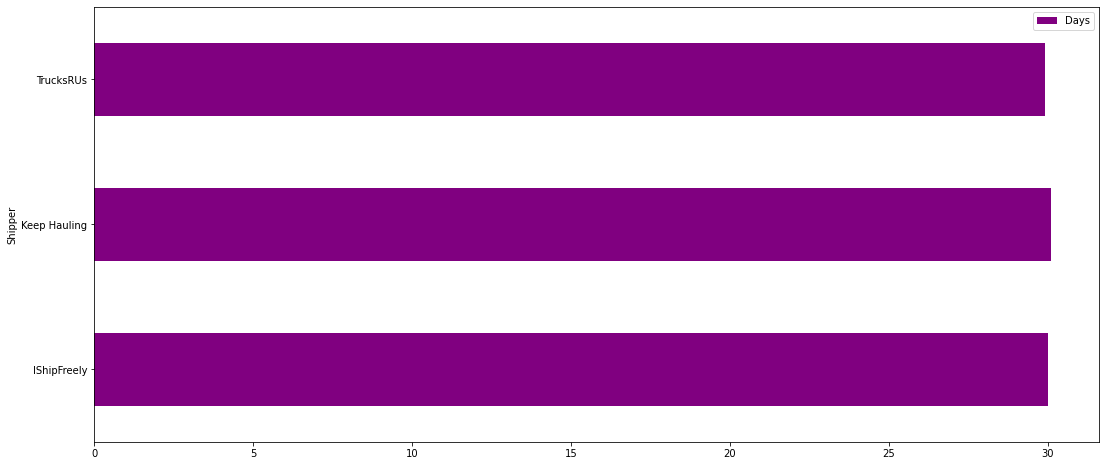

In [ ]:
shipping_time.plot(kind='barh', x='Shipper', y='Days', figsize=(18, 8), color=['purple']);

Time Series Plot of Monthly Sales for SHOOTERs

In [ ]:
%%bigquery monthly_sales_shooters

SELECT
ROUND(COUNT(`projectx-272822.preppers.shooters`.ID), 1) AS Number_of_Sales,
`projectx-272822.preppers.shooters`.Month,
FROM `projectx-272822.preppers.shooters` 
GROUP BY Month 
ORDER BY Month;

In [ ]:
import numpy as np

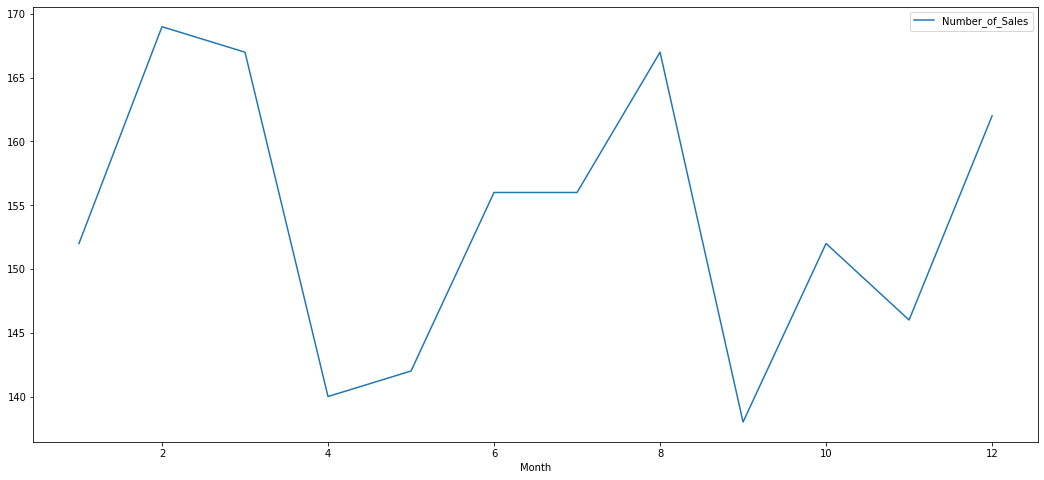

In [ ]:
monthly_sales_shooters.plot.line(x='Month', figsize=(18, 8))

Descriptive statistics (measures of central tendency and dispersion) for sales by type of rack.


In [ ]:
import statistics as st

In [ ]:
%%bigquery OrderAmountRamboRacks

SELECT
`projectx-272822.preppers.shooters`.OrderAmountRamboRacks AS Number_of_Orders,
FROM `projectx-272822.preppers.shooters`

In [ ]:
OrderAmountRamboRacks.Number_of_Orders.describe().round(2) 

count    1847.00
mean       15.90
std         9.39
min         0.00
25%         8.00
50%        16.00
75%        24.00
max        40.00
Name: Number_of_Orders, dtype: float64

In [ ]:
%%bigquery OrderAmountApocalypseRacks

SELECT
`projectx-272822.preppers.shooters`.OrderAmountApocalypseRacks AS Number_of_Orders,
FROM `projectx-272822.preppers.shooters`

In [ ]:
OrderAmountApocalypseRacks.Number_of_Orders.describe().round(2) 

count    1847.00
mean       27.46
std        16.24
min         0.00
25%        14.00
50%        27.00
75%        40.00
max        79.00
Name: Number_of_Orders, dtype: float64

In [ ]:
%%bigquery OrderAmountZombieRacks

SELECT
`projectx-272822.preppers.shooters`.OrderAmountZombieRacks AS Number_of_Orders,
FROM `projectx-272822.preppers.shooters`

In [ ]:
OrderAmountZombieRacks.Number_of_Orders.describe().round(2) 

count    1847.00
mean        8.78
std         6.50
min         0.00
25%         4.00
50%         8.00
75%        13.00
max        30.00
Name: Number_of_Orders, dtype: float64

In [ ]:
%%bigquery OrderAmountTerminatorRacks

SELECT
`projectx-272822.preppers.shooters`.OrderAmountTerminatorRacks AS Number_of_Orders,
FROM `projectx-272822.preppers.shooters`

In [ ]:
OrderAmountTerminatorRacks.Number_of_Orders.describe().round(2) 

count    1847.00
mean       12.22
std         9.67
min         0.00
25%         5.00
50%        11.00
75%        16.00
max        50.00
Name: Number_of_Orders, dtype: float64

Revenue by Sales Associate

In [ ]:
%%bigquery Revenue_by_SalesAssociate

SELECT
ROUND(AVG(`projectx-272822.preppers.shooters`.Revenue), 2) as Revenue,
SalesFirst as Sales_Associate,
FROM `projectx-272822.preppers.shooters`
GROUP BY SalesFirst


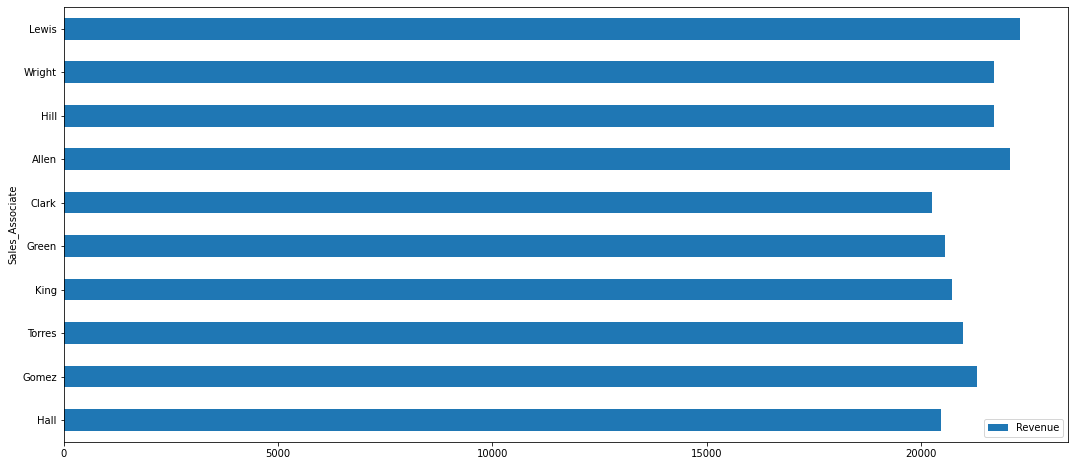

In [ ]:
Revenue_by_SalesAssociate.plot(kind='barh', x='Sales_Associate', figsize=(18, 8));

Barplot of the Total Gross Revenue by SHOOTERs’ Sales 

In [ ]:
%%bigquery Gross_Revenue

SELECT
SUM(OrderAmountTerminatorRacks * (Revenue) + OurCost + ShipCost) as Terminator,
SUM(OrderAmountRamboRacks * (Revenue) + OurCost + ShipCost) as Rambo,
SUM(OrderAmountZombieRacks * (Revenue) + OurCost + ShipCost) as Zombie,
SUM(OrderAmountApocalypseRacks * (Revenue) + OurCost + ShipCost) as Apocalypse,
FROM `projectx-272822.preppers.shooters`

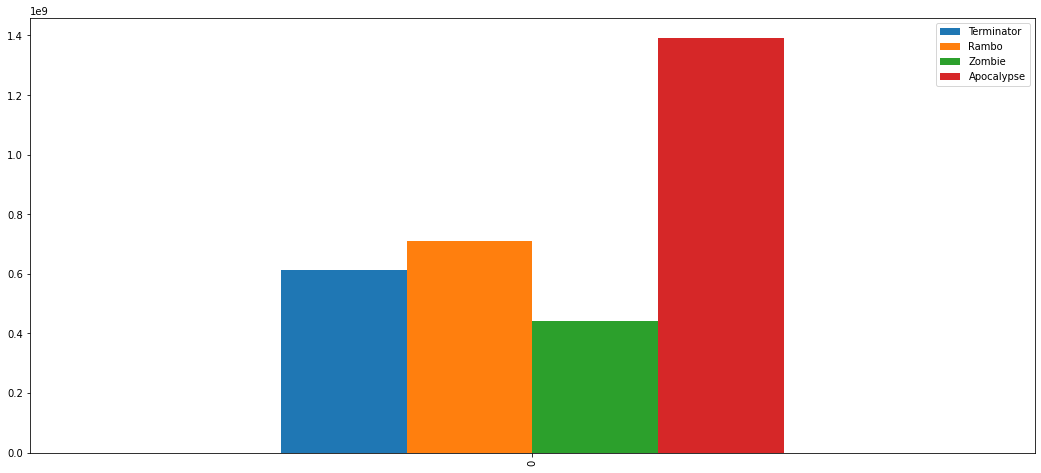

In [ ]:
Gross_Revenue.plot(kind='bar', figsize=(18, 8))

In [ ]:
%%bigquery Revenue

SELECT
AVG(OrderAmountTerminatorRacks * (Revenue)) as Terminator,
AVG(OrderAmountRamboRacks * (Revenue)) as Rambo,
AVG(OrderAmountZombieRacks * (Revenue)) as Zombie,
AVG(OrderAmountApocalypseRacks * (Revenue)) as Apocalypse,
FROM `projectx-272822.preppers.shooters`

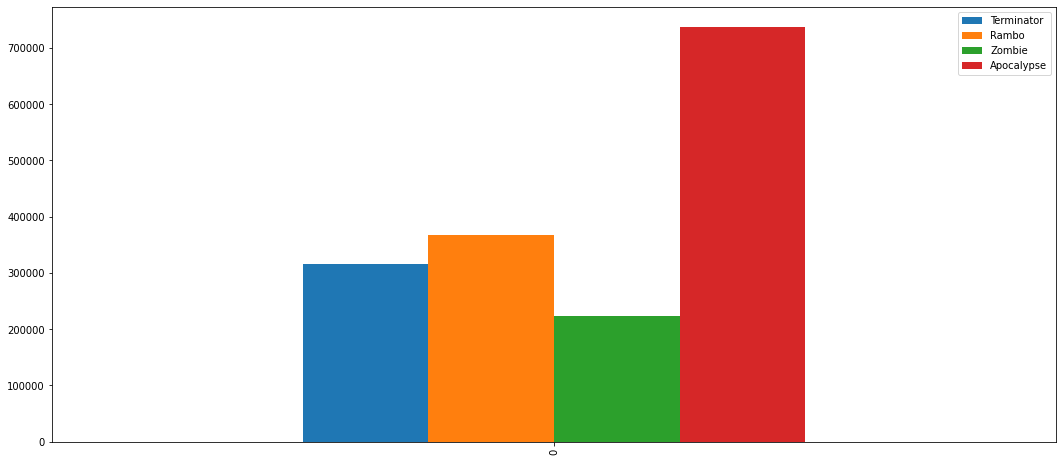

In [ ]:
Revenue.plot(kind='bar', figsize=(18, 8))

In [ ]:
%%bigquery Revenue_of_Racks_by_Year

SELECT
(AVG(`projectx-272822.preppers.shooters`.Revenue)) * (AVG(`projectx-272822.preppers.shooters`.OrderAmountTerminatorRacks)) AS Revenue_Terminator,
(AVG(`projectx-272822.preppers.shooters`.Revenue)) * (AVG(`projectx-272822.preppers.shooters`.OrderAmountRamboRacks)) AS Revenue_Rambo,
(AVG(`projectx-272822.preppers.shooters`.Revenue)) * (AVG(`projectx-272822.preppers.shooters`.OrderAmountZombieRacks))  AS Revenue_Zombie,
(AVG(`projectx-272822.preppers.shooters`.Revenue)) * (AVG(`projectx-272822.preppers.shooters`.OrderAmountApocalypseRacks))  AS Revenue_Apocalypse,
Year
FROM `projectx-272822.preppers.shooters`
GROUP BY Year

In [ ]:
Revenue_of_Racks_by_Year.round(2).sort_values(by=['Revenue_Terminator', 'Revenue_Zombie', 'Revenue_Rambo', 'Revenue_Apocalypse'])

,Revenue_Terminator,Revenue_Rambo,Revenue_Zombie,Revenue_Apocalypse,Year
1,213479.02,282567.27,154626.07,468995.86,2008
7,231401.31,331828.17,169519.49,510918.36,2005
3,238219.74,323094.06,183045.21,549011.37,2012
9,241922.18,345378.56,181477.36,609592.44,2007
5,254731.88,334023.75,178271.86,633660.72,2006
8,257906.92,351479.18,193365.39,589945.89,2001
2,266308.64,348924.09,187146.57,579769.19,2009
10,267277.46,344194.15,199050.10,614207.14,2010
6,283774.72,296845.07,196594.17,574556.23,2011
4,285939.88,368300.70,201608.03,582157.27,2004


SHOOTERs’ Sales by State

In [ ]:
%%bigquery Sales_by_State

SELECT Count(`projectx-272822.preppers.shooters`.ID) as Number_of_Sales, `projectx-272822.preppers.shooters`.CustomerState
FROM `projectx-272822.preppers.shooters`
GROUP BY CustomerState

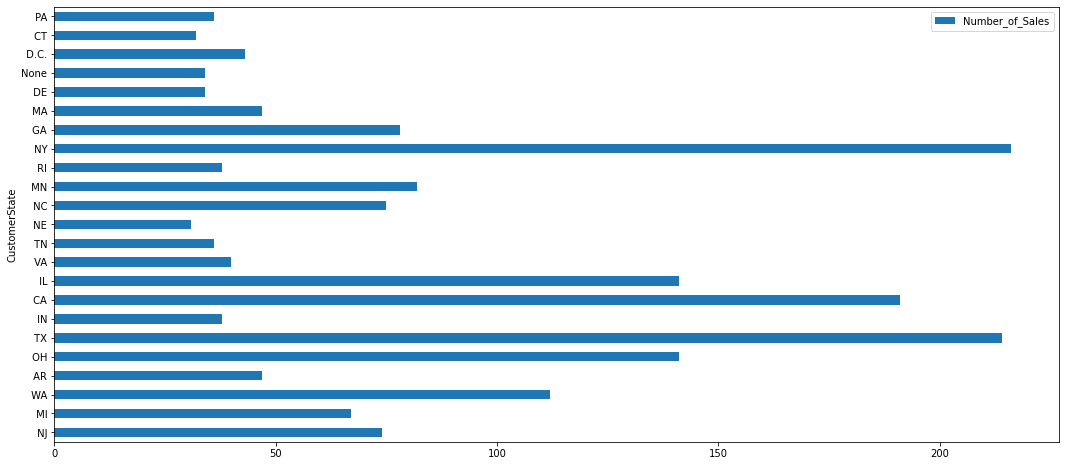

In [ ]:
Sales_by_State.plot(kind='barh', x='CustomerState', figsize=(18, 8));